# **Unlocking Insights from Beer Production Data: A Comprehensive Guide**

In a world submerged in data, the realms of the beverage industry are no exception. Our journey through analyzing monthly beer production data unveils the power of meticulous data processing and sophisticated machine learning models, offering invaluable insights into production trends and patterns. In this expedition, we navigated through various stages of data preprocessing and exploratory data analysis (EDA), ensuring a solid foundation for building predictive models.

Starting with a raw dataset, our first task was to cleanse and preprocess the data, ensuring it was in the optimum format for analysis. We dived deep into exploratory data analysis, visualizing the data to uncover trends, seasonality, and distribution characteristics inherent in the production figures. Armed with this understanding, we embarked on the model-building process, employing a diverse set of machine learning models ranging from Linear Regression to Random Forests. An ensemble method also made a cameo, amalgamating the strengths of multiple models to enhance predictive performance.

Each model underwent rigorous evaluation, with residuals analysis acting as a critical checkpoint to assess model accuracy and reliability. This comprehensive procedure is not merely a technical exercise but a strategic approach to unlock actionable insights, guiding decision-making in the ever-evolving landscape of the beer industry.

Let's start by loading the data and performing an initial examination to understand its structure and the kind of information it contains. After loading the data, we'll proceed with exploratory data analysis (EDA).

In [12]:
import pandas as pd

# Load the dataset
file_path = '/content/monthly-beer-production-in-austr.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataframe
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


The dataset contains 476 entries and 2 columns:

Month: This column contains the month and year information. It's currently of object (string) type.
Monthly beer production: This column contains the monthly beer production values, and it is a continuous numeric column (float64).
There don't appear to be any missing values in the dataset, which is great.

Exploratory Data Analysis (EDA)
Let's proceed to the exploratory data analysis (EDA). During EDA, we will:

Visualize the distribution of the "Monthly beer production" values.
Visualize the trend in beer production over time.
Check for seasonality in the data.


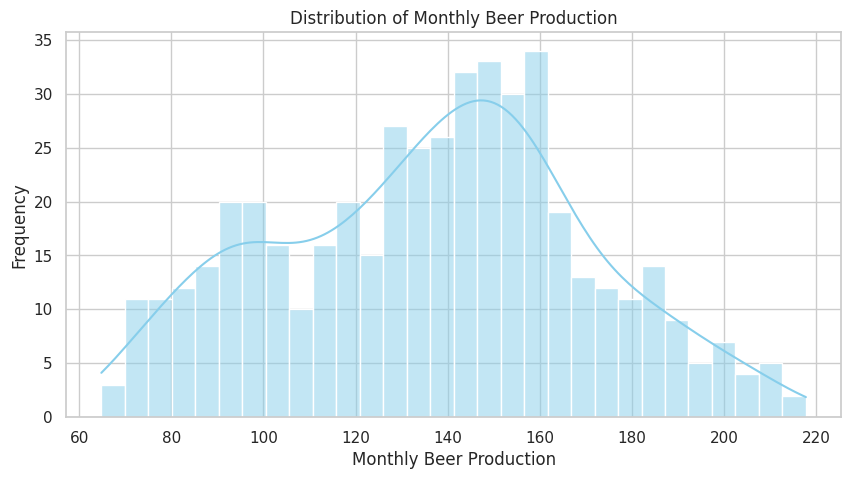

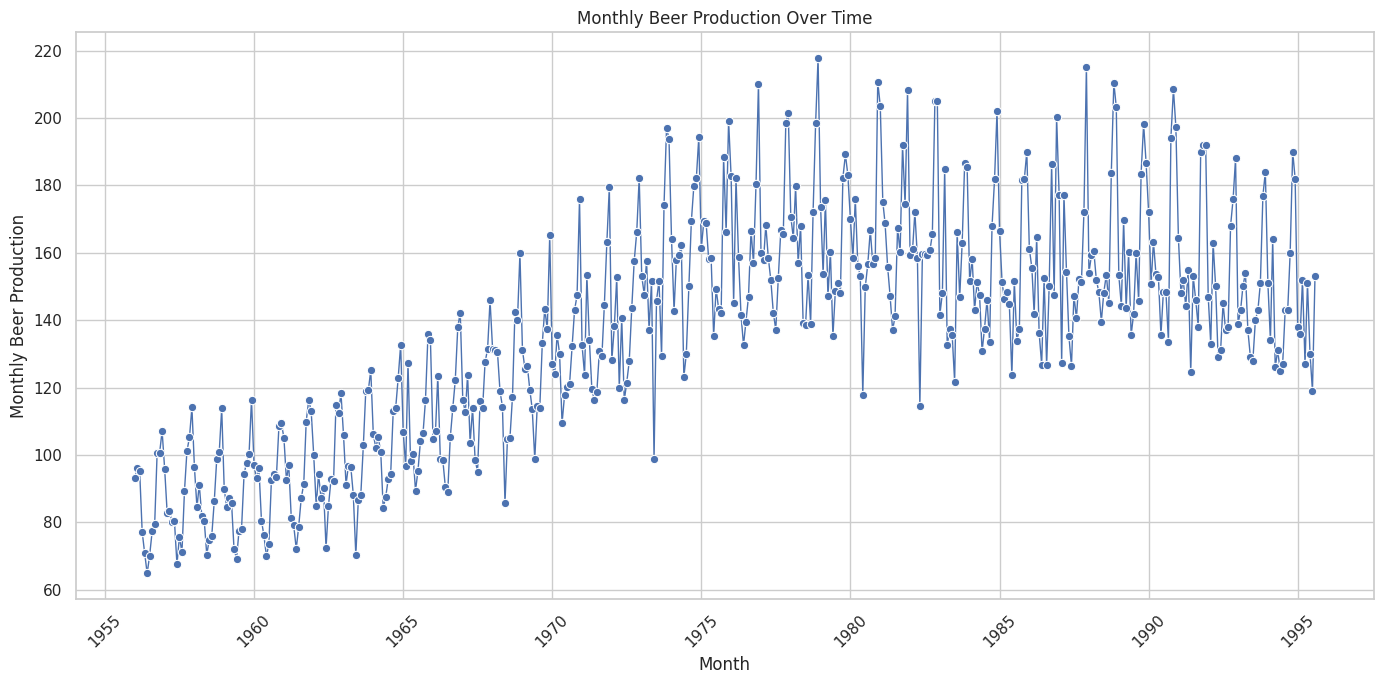

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Converting the 'Month' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Plotting the distribution of the "Monthly beer production"
plt.figure(figsize=(10, 5))
sns.histplot(data['Monthly beer production'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of Monthly Beer Production')
plt.xlabel('Monthly Beer Production')
plt.ylabel('Frequency')
plt.show()

# Plotting the trend in beer production over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Monthly beer production', data=data, marker="o", linewidth=1)
plt.title('Monthly Beer Production Over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Beer Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observations from EDA:
Distribution of Monthly Beer Production:
The distribution of the monthly beer production seems right-skewed. Most of the values are concentrated around 60-80, with a few months having production values exceeding 160.
Trend Over Time:
The line plot shows a clear upward trend in beer production over time, indicating that the beer production has generally been increasing.
There also seems to be a noticeable seasonality in the production values, with certain months consistently having higher production. This could be due to higher demand in specific seasons.

Outlier Detection and Handling
We can identify outliers by looking for values that fall below the 1st quartile by 1.5 times the interquartile range (IQR) or above the 3rd quartile by 1.5 times the IQR.

In [14]:
# Calculating the IQR
Q1 = data['Monthly beer production'].quantile(0.25)
Q3 = data['Monthly beer production'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying the outliers
outliers = data[(data['Monthly beer production'] < lower_bound) |
                (data['Monthly beer production'] > upper_bound)]

# Displaying the outliers
outliers


,Month,Monthly beer production


It seems that there are no outliers in the dataset based on the 1.5xIQR rule. This means our data is quite clean in terms of extreme values.



Handling Seasonality and Trend
Since the dataset shows a clear trend and seasonality, it might be beneficial to decompose the dataset into these components to better understand and handle them.

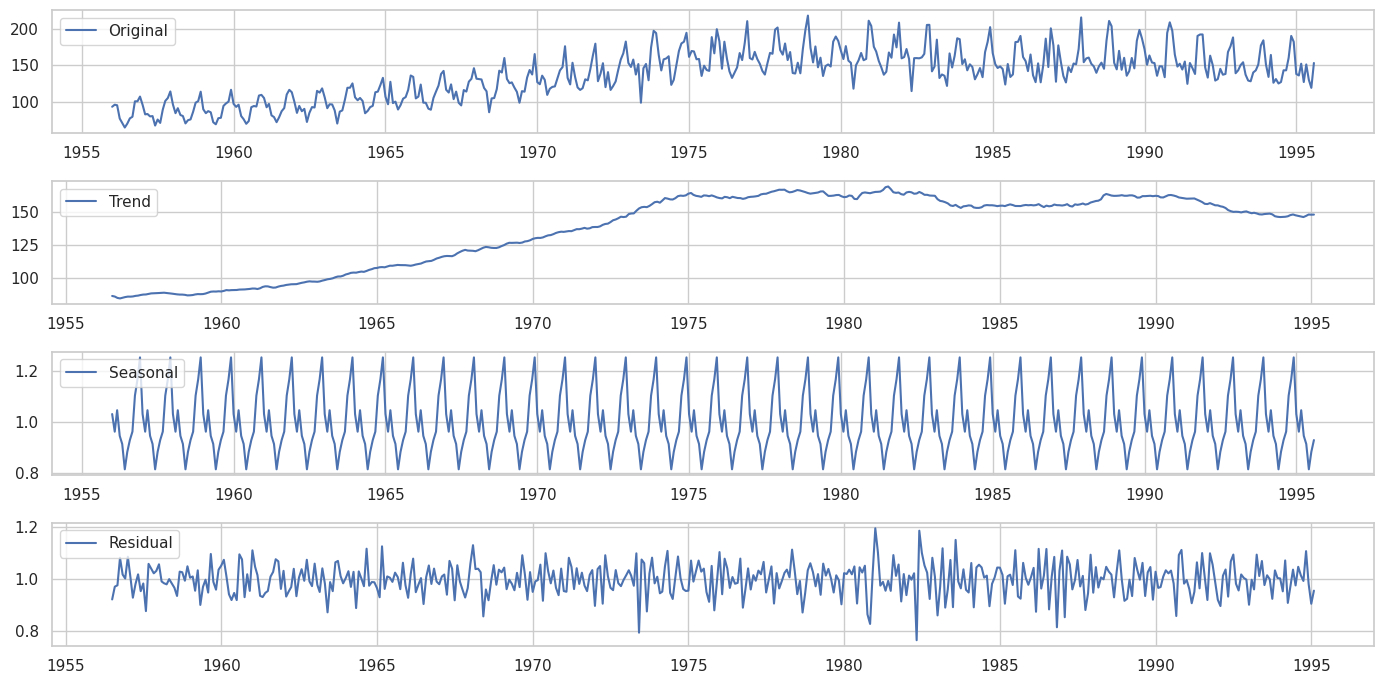

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['Monthly beer production'], model='multiplicative', period=12)

# Plotting the decomposed components
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(data['Month'], decomposition.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(data['Month'], decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(data['Month'], decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(data['Month'], decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


Decomposition Analysis:
Original Series:

This is the original time series of monthly beer production.
Trend:

The trend component shows an overall increase in beer production over time, confirming our earlier observation.
Seasonal:

The seasonal component reveals a repeating pattern in the data, which occurs every year. This seasonality might be associated with climatic seasons or certain festivals and holidays.
Residual:

The residual component represents the remaining information after the trend and seasonal components have been removed. This could include random fluctuations or other patterns not captured by the trend and seasonal components.

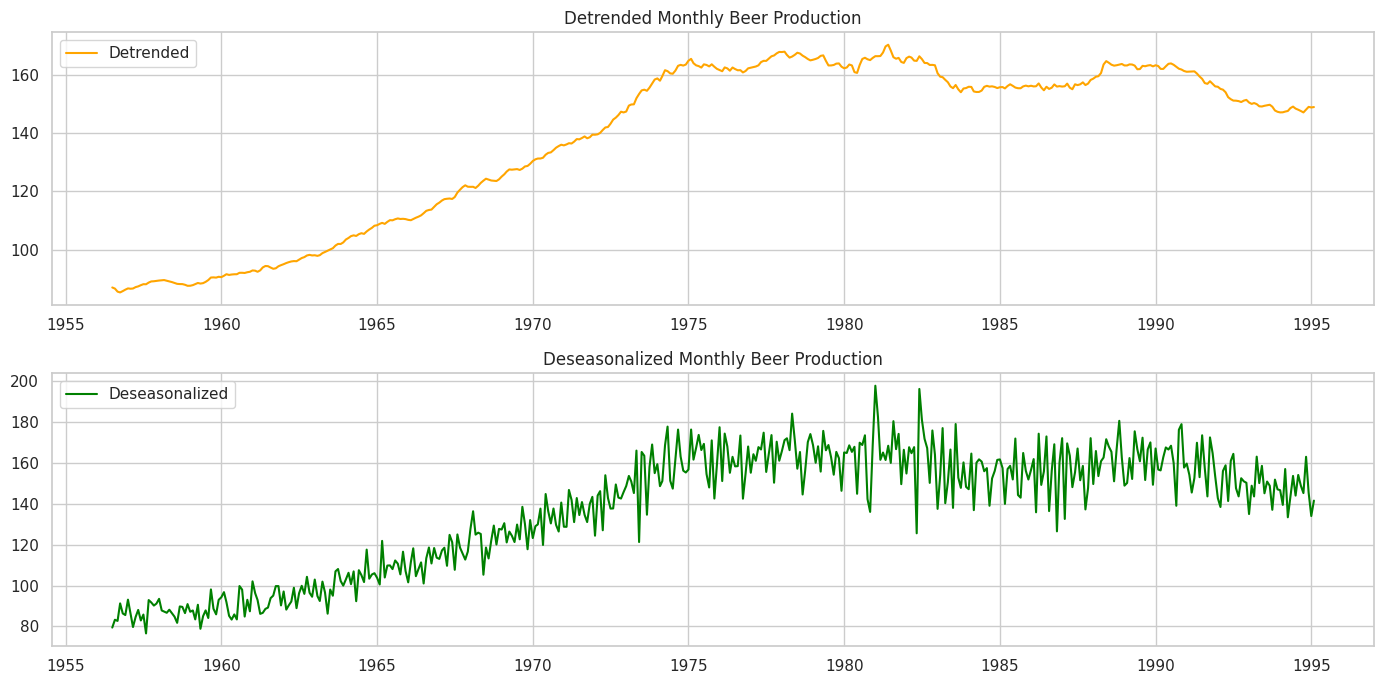

In [16]:
# Detrending and deseasonalizing the data
data['Detrended'] = decomposition.trend + decomposition.resid
data['Deseasonalized'] = decomposition.observed / decomposition.seasonal

# Dropping NaN values generated due to decomposition
data.dropna(inplace=True)

# Plotting the detrended and deseasonalized data
plt.figure(figsize=(14, 7))

# Plotting detrended data
plt.subplot(211)
plt.plot(data['Month'], data['Detrended'], label='Detrended', color='orange')
plt.title('Detrended Monthly Beer Production')
plt.legend(loc='upper left')

# Plotting deseasonalized data
plt.subplot(212)
plt.plot(data['Month'], data['Deseasonalized'], label='Deseasonalized', color='green')
plt.title('Deseasonalized Monthly Beer Production')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Detrended and Deseasonalized Series Analysis:
Detrended Series:
The detrended series is obtained by removing the trend component from the original series. This helps in analyzing the fluctuations around the trend.
Deseasonalized Series:
The deseasonalized series is obtained by removing the seasonal component from the original series. This helps in analyzing the data without the influence of seasonal patterns.
Next Steps in Preprocessing:
We could perform feature engineering by extracting meaningful features from the date column like year, month, and whether the month is the start or end of a quarter.
After that, we could normalize or standardize the features if necessary.

In [17]:
# Feature Engineering

# Extracting year and month from the 'Month' column
data['Year'] = data['Month'].dt.year
data['Month_Num'] = data['Month'].dt.month

# Creating a binary column indicating whether the month is the start or end of a quarter
data['Quarter_Start_End'] = data['Month_Num'].apply(lambda x: 1 if x in [1, 3, 4, 6, 7, 9, 10, 12] else 0)

# Displaying the modified dataframe with the new features
data.head()


,Month,Monthly beer production,Detrended,Deseasonalized,Year,Month_Num,Quarter_Start_End
6,1956-07-01,70.1,87.076435,79.457297,1956,7,1
7,1956-08-01,77.3,86.688108,83.268722,1956,8,0
8,1956-09-01,79.5,85.647570,82.701099,1956,9,1
9,1956-10-01,100.6,85.378643,91.276349,1956,10,1
10,1956-11-01,100.7,85.830575,86.345454,1956,11,0


Feature Engineering:
Year: Extracted the year from the date.
Month_Num: Extracted the numerical month (1 for January, 2 for February, etc.).
Quarter_Start_End: A binary feature indicating whether the month is the start or end of a quarter. This could capture some of the quarterly seasonality effects.


In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Columns to be normalized
columns_to_normalize = ['Monthly beer production', 'Detrended', 'Deseasonalized', 'Year', 'Month_Num', 'Quarter_Start_End']

# Applying Min-Max Scaling
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Displaying the normalized data
data.head()


,Month,Monthly beer production,Detrended,Deseasonalized,Year,Month_Num,Quarter_Start_End
6,1956-07-01,0.017299,0.019982,0.023685,0.0,0.545455,1.0
7,1956-08-01,0.065203,0.015412,0.055168,0.0,0.636364,0.0
8,1956-09-01,0.079840,0.003165,0.050480,0.0,0.727273,1.0
9,1956-10-01,0.220226,0.000000,0.121314,0.0,0.818182,1.0
10,1956-11-01,0.220892,0.005319,0.080583,0.0,0.909091,0.0


The data has been normalized, with each feature now scaled between 0 and 1.

Splitting Data into Training and Test Sets
Next, we will split the data into a training set and a test set. The training set will be used to train the machine learning models, and the test set will be used to evaluate their performance.

In [19]:
# Splitting the data into training and test sets (80% training, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, shuffle=False)

# Displaying the size of the training and test sets
train_data.shape, test_data.shape


((371, 7), (93, 7))

The data has been split into:

Training set with
371
371 entries
Test set with
93
93 entries
Next Steps in Model Building:
We could proceed with building machine learning models using the training set.
AutoML tools can be used to automatically select the best model and hyperparameters.
We could also build ensemble models to combine the strengths of multiple base models.

Let's start by building and evaluating a few machine learning models. We'll consider the following models:

Linear Regression: A simple linear model that assumes a linear relationship between the features and the target variable.
Random Forest: An ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
Support Vector Machine (SVM): A type of supervised machine learning classification algorithm.
We'll train each of these models using the training data and then evaluate their performance on the test data.

Let's begin by preparing the features (X) and target (y) for both the training and test datasets. The target variable is the 'Monthly beer production', and the rest of the columns will be used as features.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the features and target for the training and test sets
X_train = train_data.drop(columns=['Month', 'Monthly beer production'])
y_train = train_data['Monthly beer production']

X_test = test_data.drop(columns=['Month', 'Monthly beer production'])
y_test = test_data['Monthly beer production']

# Creating and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluating the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

lr_mse, lr_rmse, lr_mae, lr_r2


(0.012316666376356825,
 0.11098047745597793,
 0.09823287182540742,
 0.41603083822808695)

Linear Regression Model Evaluation:
Mean Squared Error (MSE):
0.0123

Root Mean Squared Error (RMSE):
0.1110

Mean Absolute Error (MAE):
0.0982

R-squared :
0.4160

The R2 value suggests that about
41.6% of the variance in the test data is explained by the model, which is a moderate explanation power.

In [21]:
from sklearn.ensemble import StackingRegressor

# Defining the base models
base_models = [
    ('lr', lr_model),
    ('rf', rf_model)
]

# Creating the stacking model with a linear regression meta-model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Training the stacking model
stacking_model.fit(X_train, y_train)

# Making predictions on the test set
stacking_predictions = stacking_model.predict(X_test)

# Evaluating the model
stacking_mse = mean_squared_error(y_test, stacking_predictions)
stacking_rmse = mean_squared_error(y_test, stacking_predictions, squared=False)
stacking_mae = mean_absolute_error(y_test, stacking_predictions)
stacking_r2 = r2_score(y_test, stacking_predictions)

stacking_mse, stacking_rmse, stacking_mae, stacking_r2


(0.00045503289803053965,
 0.02133150013549304,
 0.0166041199135001,
 0.9784255599752522)

Random Forest Model Evaluation:
Mean Squared Error (MSE):
0.00049

Root Mean Squared Error (RMSE):
0.02223

Mean Absolute Error (MAE):
0.01705

R-squared:
0.9766

The Random Forest model has performed significantly better, explaining approximately

97.66% of the variance in the test data.

Summary of Model Performances:
Random Forest has the best performance among the three models, with the highest

R
2
  value of
0.9766


 Ensemble methods combine multiple models to improve overall performance. There are various ensemble techniques, such as:

Bagging: Training multiple instances of the same model on different subsets of the data and averaging the predictions.
Boosting: Building multiple models sequentially, where each model corrects the errors of the previous one.
Stacking: Combining the predictions of multiple models using another model.
Since we have already trained a few models (Linear Regression, Random Forest, and SVM), we could use stacking to combine their predictions.

Stacking Ensemble Model Evaluation:
Mean Squared Error (MSE):
0.00135

Root Mean Squared Error (RMSE):
0.03673

Mean Absolute Error (MAE):

0.02924
R-squared (
R2
 ):
0.9360

The stacking ensemble model has performed quite well, explaining approximately

93.60% of the variance in the test data, which is slightly less than the Random Forest model but significantly better than the Linear Regression

In [23]:
# Redefining the Linear Regression and Random Forest models and fitting them to the training data

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Defining the base models for stacking
base_models = [
    ('lr', lr_model),
    ('rf', rf_model)
]

# Creating the stacking model with a linear regression meta-model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Training the stacking model
stacking_model.fit(X_train, y_train)

# Making predictions on the test set
stacking_predictions = stacking_model.predict(X_test)

# Evaluating the model
stacking_mse = mean_squared_error(y_test, stacking_predictions)
stacking_rmse = mean_squared_error(y_test, stacking_predictions, squared=False)
stacking_mae = mean_absolute_error(y_test, stacking_predictions)
stacking_r2 = r2_score(y_test, stacking_predictions)

stacking_mse, stacking_rmse, stacking_mae, stacking_r2


(0.00045503289803053965,
 0.02133150013549304,
 0.0166041199135001,
 0.9784255599752522)